In [1]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Read Data

In [2]:
X_train = pd.read_csv('data/train.csv', index_col='Id')
X_test = pd.read_csv('data/test.csv', index_col='Id')

In [3]:
X_train.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 80, dtype: object

Preprocessing: Combine Date

# Dividing the Features

In [4]:
all_cols = X_train.columns
exclude_cols = ["SalePrice"]
all_cols = list(set(all_cols) - set(exclude_cols))

object_cols = [cname for cname in all_cols if
                    X_train[cname].dtype == "object"]
categorical_cols = [cname for cname in object_cols if
                    X_train[cname].nunique() < 30]
label_cols = [cname for cname in object_cols if
                    X_train[cname].nunique() >= 30]
numerical_cols = [cname for cname in all_cols if 
                X_train[cname].dtype in ['int64', 'float64']]

numeric_to_categorical = [] #["OverallQual","OverallCond"]

categorical_cols = categorical_cols + numeric_to_categorical
numerical_cols = list(set(numerical_cols) - set(numeric_to_categorical))
i=0


# Data Distribution: Numerical

In [5]:
col = numerical_cols[i]
print("Column Name", col, i )
print("Nunique", X_train[col].nunique())
i = i +1
# X_train_full.hist(col)
X_train[col].value_counts(ascending=True)


Column Name BsmtFullBath 0
Nunique 4


3      1
2     15
1    588
0    856
Name: BsmtFullBath, dtype: int64

In [6]:
# fig = plt.figure(figsize=(12,18))
# for i in range(len(numerical_cols)):
#     fig.add_subplot(9,4,i+1)
#     sns.distplot(X_train[numerical_cols].iloc[:,i].dropna(), rug=True, hist=False, label='UW', kde_kws={'bw':0.1})
#     plt.xlabel(X_train[numerical_cols].columns[i])
# plt.tight_layout()
# plt.show()

In [7]:
# fig = plt.figure(figsize=(12,18))
# for i in range(len(numerical_cols)):
#     fig.add_subplot(9,4,i+1)
#     sns.boxplot(y=X_train[numerical_cols].iloc[:,i])

# plt.tight_layout()
# plt.show()

In [8]:
# fig = plt.figure(figsize=(12,18))
# for i in range(len(numerical_cols)):
#     fig.add_subplot(9, 4, i+1)
#     sns.scatterplot(X_train[numerical_cols].iloc[:, i],X_train['SalePrice'])
# plt.tight_layout()
# plt.show()

# Data Distribution: Categorical

In [9]:
# columns = len(categorical_cols)/4+1

# fg, ax = plt.subplots(figsize=(20, 30))

# for i, col in enumerate(categorical_cols):
#     fg.add_subplot(columns, 4, i+1)
#     sns.countplot(X_train[col])
#     plt.xlabel(col)
#     plt.xticks(rotation=90)

# plt.tight_layout()
# plt.show()

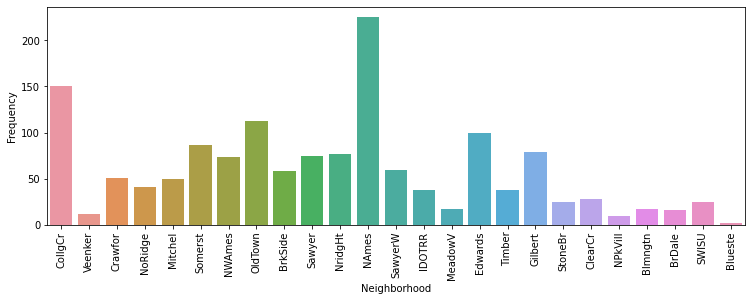

In [10]:
## Individual plot
fig = plt.figure(figsize=(12.5,4))
sns.countplot(x='Neighborhood', data=X_train)
plt.xticks(rotation=90)
plt.ylabel('Frequency')
plt.show()

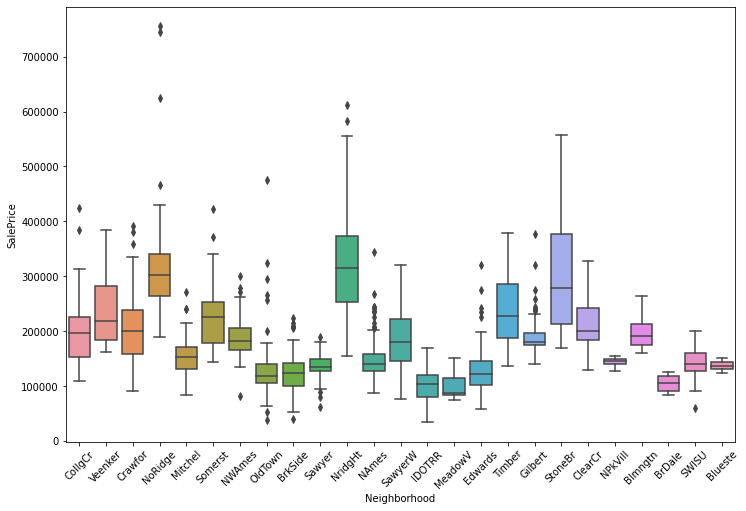

In [11]:
## Boxplot for each categorical value 
f, ax = plt.subplots(figsize=(12,8))
sns.boxplot(y=X_train.SalePrice, x=X_train.Neighborhood)
plt.xticks(rotation=45)
plt.show()

# Removing Outliers

In [12]:
# figure, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10)) = plt.subplots(nrows=5, ncols=2)
# figure.set_size_inches(16,28)
# _ = sns.regplot(X_train['LotFrontage'], X_train['SalePrice'], ax=ax1)
# _ = sns.regplot(X_train['LotArea'], X_train['SalePrice'], ax=ax2)
# _ = sns.regplot(X_train['MasVnrArea'], X_train['SalePrice'], ax=ax3)
# _ = sns.regplot(X_train['BsmtFinSF1'], X_train['SalePrice'], ax=ax4)
# _ = sns.regplot(X_train['TotalBsmtSF'], X_train['SalePrice'], ax=ax5)
# _ = sns.regplot(X_train['GrLivArea'], X_train['SalePrice'], ax=ax6)
# _ = sns.regplot(X_train['1stFlrSF'], X_train['SalePrice'], ax=ax7)
# _ = sns.regplot(X_train['EnclosedPorch'], X_train['SalePrice'], ax=ax8)
# _ = sns.regplot(X_train['MiscVal'], X_train['SalePrice'], ax=ax9)
# _ = sns.regplot(X_train['LowQualFinSF'], X_train['SalePrice'], ax=ax10)

In [13]:
X_train.shape

(1460, 80)

In [14]:
X_train = X_train.drop(X_train[X_train['LotFrontage']>200].index)
X_train = X_train.drop(X_train[X_train['LotArea']>100000].index)
X_train = X_train.drop(X_train[X_train['MasVnrArea']>1200].index)
X_train = X_train.drop(X_train[X_train['BsmtFinSF1']>4000].index)
X_train = X_train.drop(X_train[X_train['TotalBsmtSF']>4000].index)
X_train = X_train.drop(X_train[X_train['GrLivArea']>4000].index)
X_train = X_train.drop(X_train[X_train['1stFlrSF']>4000].index)
X_train = X_train.drop(X_train[X_train['EnclosedPorch']>500].index)
X_train = X_train.drop(X_train[X_train['MiscVal']>5000].index)
X_train = X_train.drop(X_train[(X_train['LowQualFinSF']>550) & (X_train['SalePrice']>400000)].index)

In [15]:
X_train.shape

(1445, 80)

# Removing Highly Corelated Features

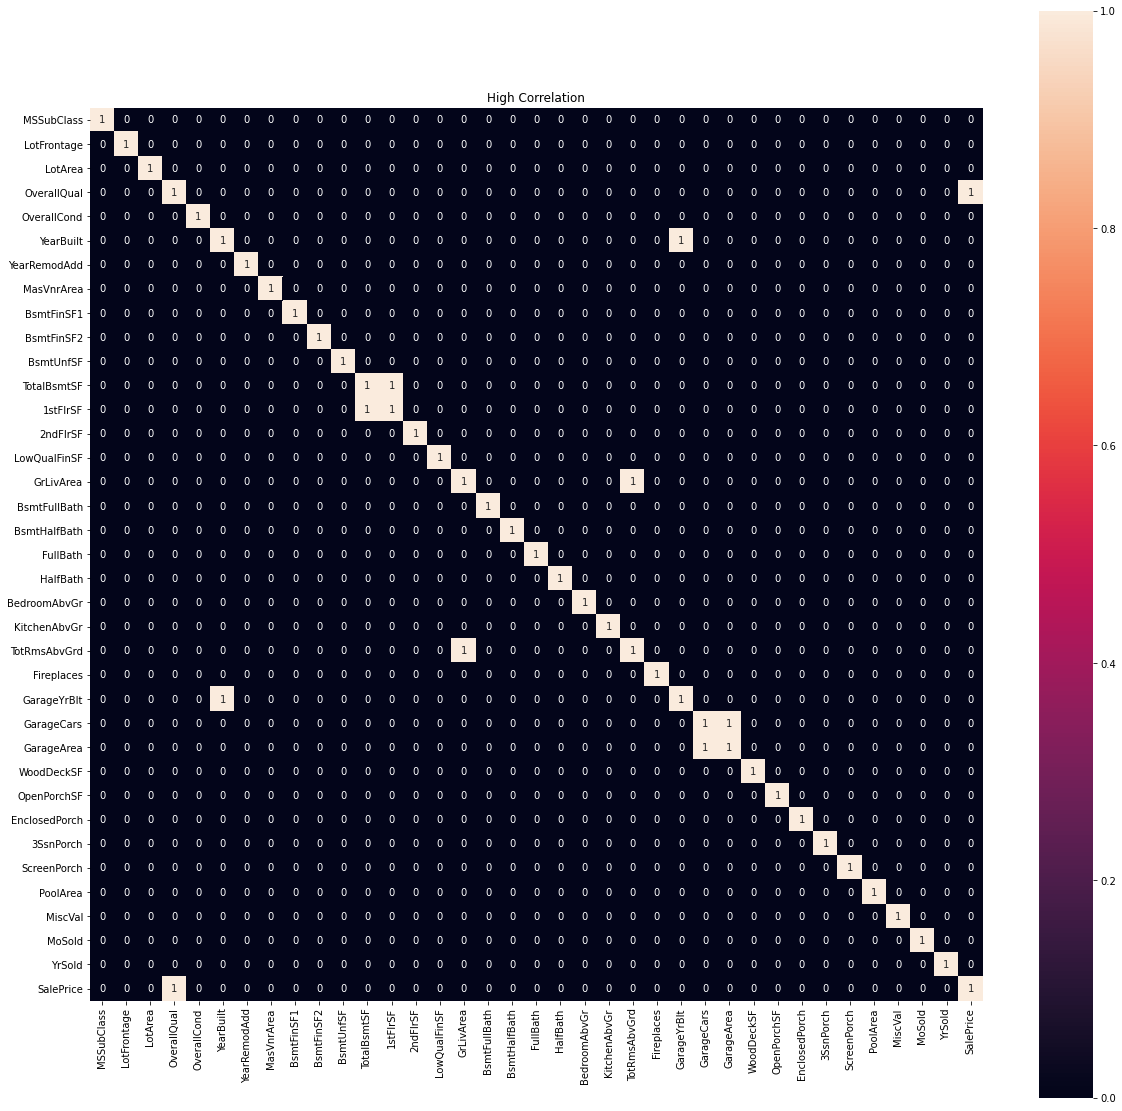

In [16]:
num_correlation = X_train.select_dtypes(exclude='object').corr()
plt.figure(figsize=(20,20))
plt.title('High Correlation')
sns.heatmap(num_correlation>0.8, annot=True, square=True)

In [17]:
cor_cols = ['GarageCars','GrLivArea','1stFlrSF','GarageYrBlt']
# numerical_cols = list(set(numerical_cols) - set(cor_cols[0]))

# Removing Cols With High Missing Data 

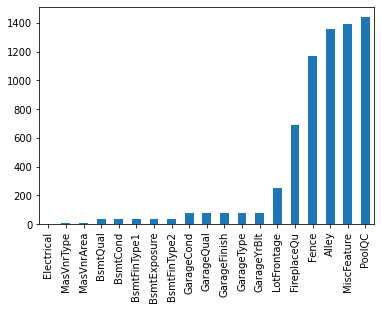

In [18]:
missing = X_train.isnull().sum()
missing = missing[missing>0]
missing.sort_values(inplace=True)
missing.plot.bar()

In [19]:
X_train.isnull().mean().sort_values(ascending=False).head(20)

PoolQC          0.997232
MiscFeature     0.965398
Alley           0.937716
Fence           0.807612
FireplaceQu     0.476817
LotFrontage     0.175779
GarageType      0.056055
GarageCond      0.056055
GarageFinish    0.056055
GarageQual      0.056055
GarageYrBlt     0.056055
BsmtFinType2    0.026298
BsmtExposure    0.026298
BsmtQual        0.025606
BsmtCond        0.025606
BsmtFinType1    0.025606
MasVnrArea      0.005536
MasVnrType      0.005536
Electrical      0.000692
RoofMatl        0.000000
dtype: float64

In [20]:
missing_cols = X_train.isnull().mean().sort_values(ascending=False).head(3).index.to_list()
numerical_cols = list(set(numerical_cols) - set(missing_cols))
categorical_cols = list(set(categorical_cols) - set(missing_cols))

# Finding the features with skewed data

In [21]:
num_series = pd.Series(X_train[numerical_cols].columns)
most_skewed = num_series.map(lambda i: X_train[i].value_counts(ascending=True).iloc[-1]/X_train.shape[0]).sort_values(ascending=False)
most_skewed_num = num_series[most_skewed[most_skewed > 0.9].index].tolist()
most_skewed_num

['PoolArea',
 '3SsnPorch',
 'LowQualFinSF',
 'MiscVal',
 'KitchenAbvGr',
 'BsmtHalfBath',
 'ScreenPorch']

In [22]:
most_skewed_num = ['PoolArea',"LowQualFinSF"]

In [23]:
cat_series = pd.Series(X_train[categorical_cols].columns)
most_skewed = cat_series.map(lambda i: X_train[i].value_counts(ascending=True).iloc[-1]/X_train.shape[0]).sort_values(ascending=False)
most_skewed_cat = cat_series[most_skewed[most_skewed > 0.98].index].tolist()[0]
most_skewed_cat 

'Utilities'

In [24]:
numerical_cols = list(set(numerical_cols) - set(most_skewed_num))
categorical_cols = list(set(categorical_cols) - set(most_skewed_cat))

# Missing Data


In [25]:
# LotFrontage can be predicted using the average in the Neighbourhood
X_train['LotFrontage'] = X_train.groupby('Neighborhood')['LotFrontage'].apply(lambda x: x.fillna(x.median()))
X_test['LotFrontage'] = X_test.groupby('Neighborhood')['LotFrontage'].apply(lambda x: x.fillna(x.median()))

# Feature Engineering

In [26]:
added_cols = []
# X_train['YrSold_MoSold'] = X_train["YrSold"].astype('str') + "_" + X_train["MoSold"].astype('str')
# X_test['YrSold_MoSold'] = X_test["YrSold"].astype('str') + "_" + X_test["MoSold"].astype('str')
# added_cols.append("YrSold_MoSold")

In [27]:
# figure, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3)
# figure.set_size_inches(20,10)
# _ = sns.regplot(X_train['TotalBsmtSF'], X_train['SalePrice'], ax=ax1)
# _ = sns.regplot(X_train['2ndFlrSF'], X_train['SalePrice'], ax=ax2)
# _ = sns.regplot(X_train['TotalBsmtSF'] + X_train['2ndFlrSF'], X_train['SalePrice'], ax=ax3)


In [28]:
# X_train['TotalSF']=X_train['TotalBsmtSF']  + X_train['2ndFlrSF']
# X_test['TotalSF']=X_test['TotalBsmtSF']  + X_test['2ndFlrSF']
# added_cols.append("TotalSF")

In [29]:
# figure, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
# figure.set_size_inches(14,10)
# _ = sns.barplot(X_train['BsmtFullBath'], X_train['SalePrice'], ax=ax1)
# _ = sns.barplot(X_train['FullBath'], X_train['SalePrice'], ax=ax2)
# _ = sns.barplot(X_train['BsmtHalfBath'], X_train['SalePrice'], ax=ax3)
# _ = sns.barplot(X_train['BsmtFullBath'] + X_train['FullBath'] + X_train['BsmtHalfBath'] + X_train['HalfBath'], X_train['SalePrice'], ax=ax4)

In [30]:
# X_train['TotalBath']=X_train['BsmtFullBath'] + X_train['FullBath'] + (0.5*X_train['BsmtHalfBath']) + (0.5*X_train['HalfBath'])
# X_test['TotalBath']=X_test['BsmtFullBath'] + X_test['FullBath'] + X_test['BsmtHalfBath'] + X_test['HalfBath']
# added_cols.append("TotalBath")

X_train['Porch_SF'] = (X_train['OpenPorchSF'] + X_train['3SsnPorch'] + X_train['EnclosedPorch'] + X_train['ScreenPorch'] + X_train['WoodDeckSF'])
X_test['Porch_SF'] = (X_test['OpenPorchSF'] + X_test['3SsnPorch'] + X_test['EnclosedPorch'] + X_test['ScreenPorch'] + X_test['WoodDeckSF'])
added_cols.append("Porch_SF")

In [31]:
# X_train['Has2ndfloor'] = X_train['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
# X_train['HasBsmt'] = X_train['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
# X_train['HasFirePlace'] = X_train['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)
# X_train['Has2ndFlr']=X_train['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
# X_train['HasBsmt']=X_train['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)

# X_test['Has2ndfloor'] = X_test['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
# X_test['HasBsmt'] = X_test['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
# X_test['HasFirePlace'] = X_test['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)
# X_test['Has2ndFlr']=X_test['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
# X_test['HasBsmt']=X_test['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
# cols= ["Has2ndfloor",'HasBsmt','HasFirePlace','Has2ndFlr','HasBsmt']
# added_cols.extend(cols)

# Train / Test split. Cross Validation

In [32]:
# Remove rows with missing target, separate target from predictors
X_train.dropna(axis=0, subset=['SalePrice'], inplace=True)
y_train = X_train.SalePrice
X_train.drop(['SalePrice'], axis=1, inplace=True)

# Break off validation set from training data
# X_train, X_valid, y_train, y_valid = train_test_split(X_full, y, 
#                                                                 train_size=0.8, test_size=0.2,
#

In [33]:
my_cols = categorical_cols + label_cols + numerical_cols + added_cols
print(len(my_cols))

# Keep selected columns only
X_train_1 = X_train[my_cols].copy()
# X_valid = X_valid_full[my_cols].copy()
X_test_1 = X_test[my_cols].copy()

75


# Builing the Pipeline

In [34]:
# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='constant',fill_value=0)

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

label_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant')),
    ('label', OrdinalEncoder())
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols),
        ('lbl', label_transformer, label_cols)
    ])

# Selecting the Model

In [35]:
# from sklearn.ensemble import RandomForestRegressor
# model = RandomForestRegressor(n_estimators=100, random_state=0)


In [36]:
# from sklearn.linear_model import LinearRegression
# model = LinearRegression()

In [37]:
# from sklearn.linear_model import Lasso
# model = Lasso(alpha=0.1)

In [38]:
from xgboost import XGBRegressor
model = XGBRegressor(n_estimators=1000, learning_rate=0.05)

In [39]:
# Bundle preprocessing and modeling code in a pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', model)
                     ])

# Training the Model

In [40]:
# clf.fit(X_train, y_train)
# preds = clf.predict(X_valid)

# print('MAE:', mean_absolute_error(y_valid, preds))

# best 14949

In [41]:
from sklearn.model_selection import cross_val_score
scores = -1 * cross_val_score(clf, X_train_1, y_train,
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("Average MAE score:", scores.mean())

Average MAE score: 15013.252600562284


# Test Predictions

In [42]:
clf.fit(X_train_1, y_train)

# Preprocessing of test data, fit model
preds_test = clf.predict(X_test_1)


Run the next code cell without changes to save your results to a CSV file that can be submitted directly to the competition.

In [43]:
# Save test predictions to file
output = pd.DataFrame({'Id': X_test.index,
                       'SalePrice': preds_test})
output.to_csv('submission.csv', index=False)

In [44]:
#  REF: https://www.kaggle.com/prestonfan/ultimate-predictions-guide-v6